In [5]:
# Instalação de pacotes necessários

%pip install opencv-python==4.12.0
%pip install numpy==2.2.6
%pip install matplotlib==3.10.3

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.12.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86, 4.12.0.88)
ERROR: No matching distribution found for opencv-python==4.12.0


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importação de bibliotecas e verificação de versões

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(cv2.__version__)
print(np.__version__)
print(matplotlib.__version__)

4.12.0
2.2.6
3.10.3


# Demonstração do efeito de Blur Gaussiano na imagem

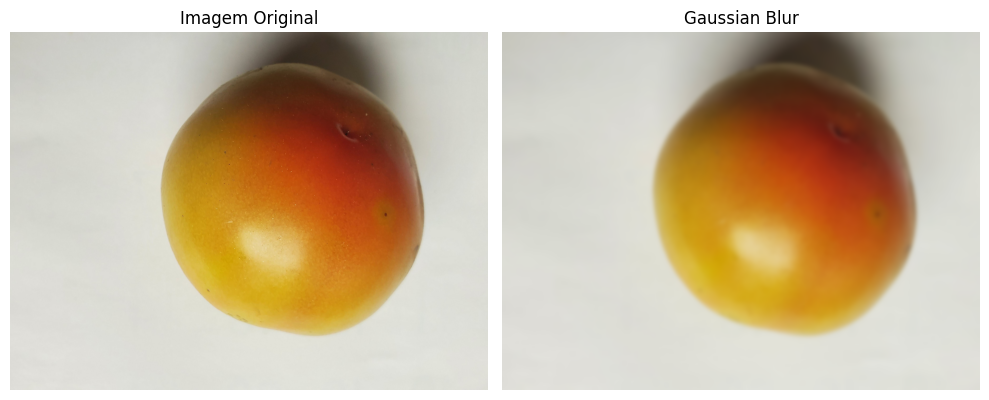

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Carrega a imagem
image = cv2.imread('./test_images/1.jpg')

# 2. Aplica o efeito de blur gaussiano
# O segundo argumento é o tamanho do kernel (deve ser ímpar e positivo)
# O terceiro argumento é o desvio padrão no eixo X (se 0, é calculado automaticamente)
blurred = cv2.GaussianBlur(image, (111, 111), 0)

# 3. Converte para RGB para exibir corretamente com matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# 4. Mostra a imagem original e a com blur
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_rgb)
plt.title('Gaussian Blur')
plt.axis('off')

plt.tight_layout()
plt.show()


# Implementação Inicial: Uso de apenas um limiar de cores HSV

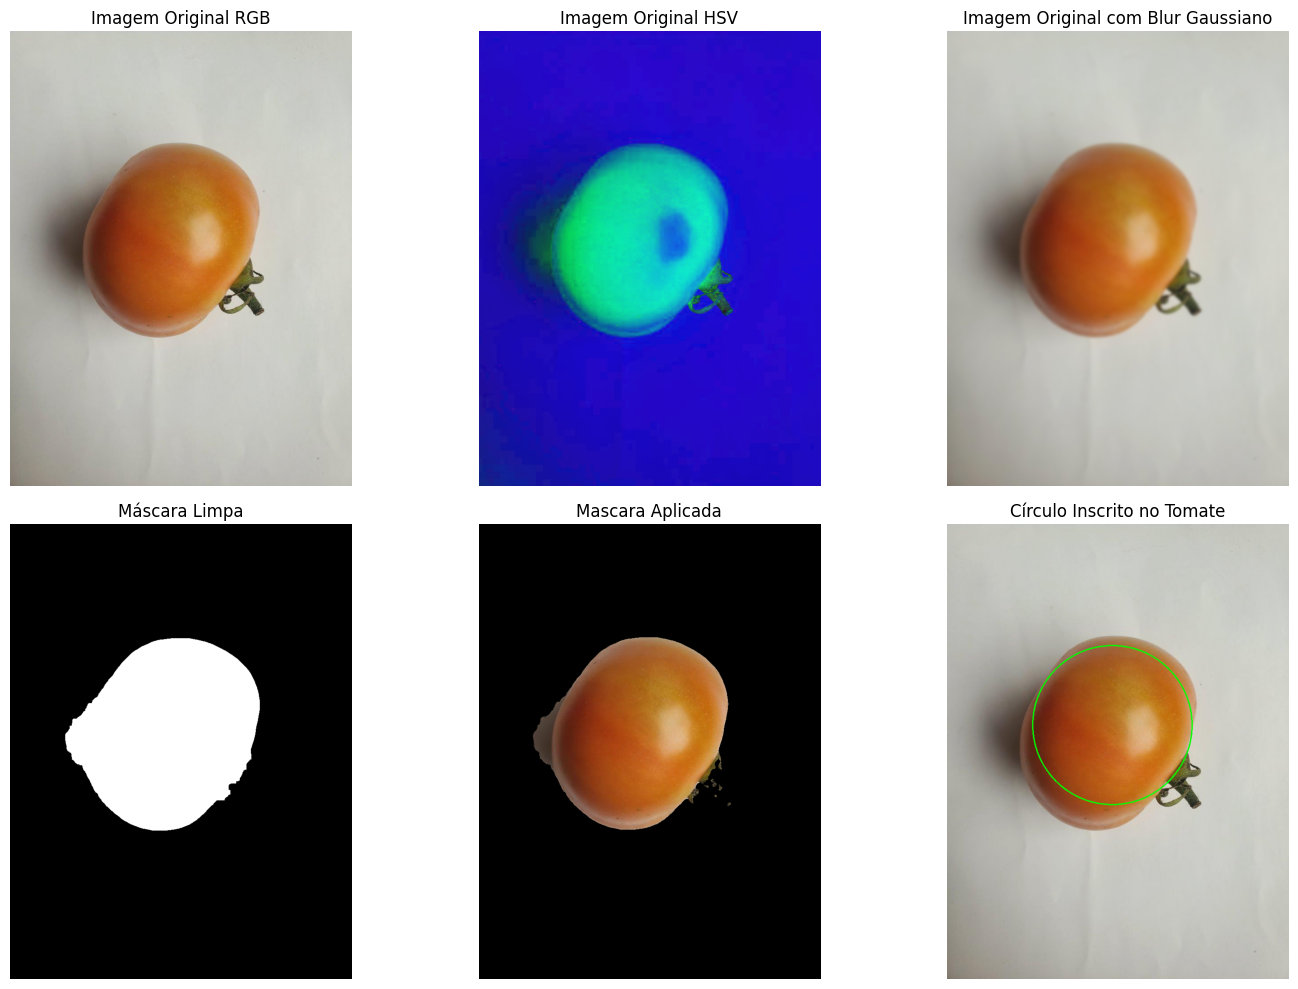

In [ ]:
# 1. Carregar e converter a imagem
image = cv2.imread('./test_images/5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (17, 17), 0)
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# 2. Limiar de cores HSV para criar a máscara do tomate
lower = np.array([0, 67, 50])   # H, S, V
upper = np.array([25, 255, 255])
mask = cv2.inRange(image_blurred_hsv, lower, upper)

# 3. Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# 4. Limpeza da máscara com operações morfológicas
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 5. Aplicar transformada de distância
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# 6. Determinar o círculo inscrito
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# 7. Desenhar o círculo na imagem original
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# 8. Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_hsv)
plt.title("Imagem Original HSV")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(mask_clean, cmap='gray')
plt.title("Máscara Limpa")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()

# Passo 01: Uso de 3 limiares HSV para abranger maior diversidade de tons de cores dos tomates

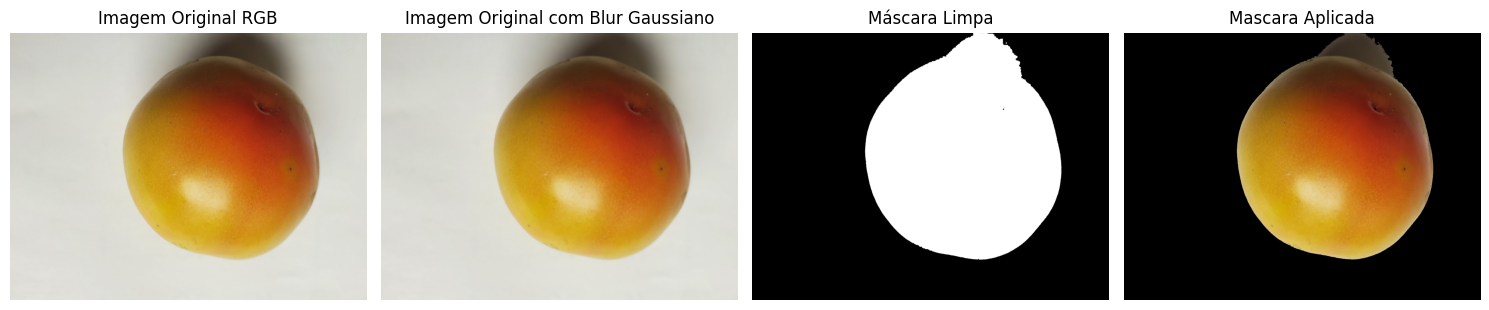

In [17]:
# 1. Carregar e converter a imagem
image = cv2.imread('./test_images/1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
image_blurred_rgb = cv2.GaussianBlur(image_rgb, (21, 21), 0)
image_blurred_hsv = cv2.cvtColor(image_blurred_rgb, cv2.COLOR_RGB2HSV)

# 2. Limiar de cores HSV para criar a máscara do tomate
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 50])
upper_red2 = np.array([179, 255, 255])

lower_red3 = np.array([0, 67, 50])
upper_red3 = np.array([25, 255, 255])

# 3. Construção da Máscara apartir de todos os limiares
mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask3 = cv2.inRange(image_hsv, lower_red3, upper_red3)
mask = cv2.bitwise_or(mask1, mask2)
mask = cv2.bitwise_or(mask, mask3)

# 4. Aplicar a máscara
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(image_blurred_rgb)
plt.title("Imagem Original com Blur Gaussiano")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask_clean, cmap='gray')
plt.title("Máscara Limpa")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(result)
plt.title("Mascara Aplicada")
plt.axis('off')

plt.tight_layout()
plt.show()


# Passo 02: Delimitar os círculos concêntricos para analisar a maturidade do tomate

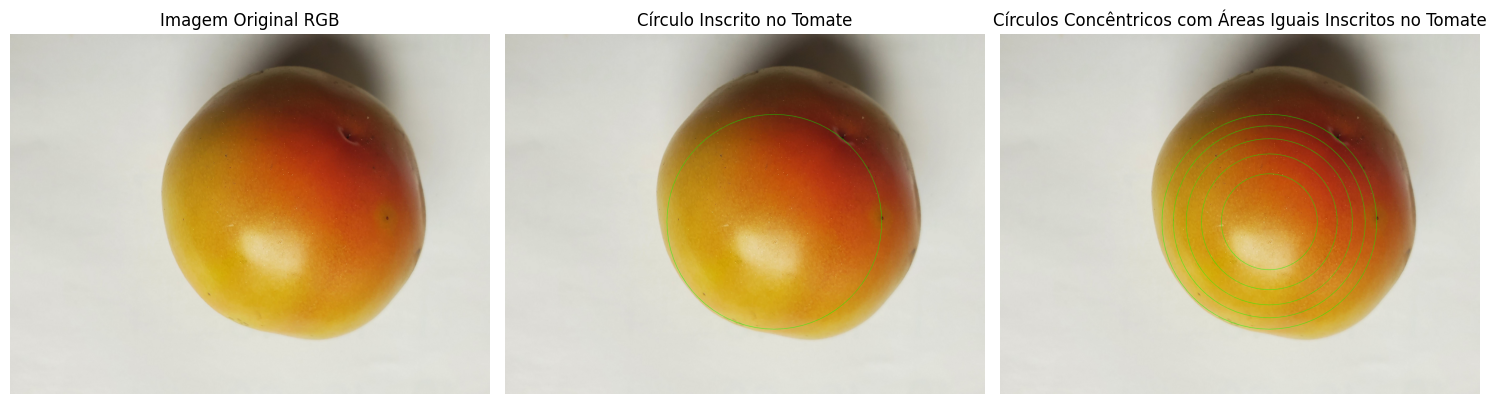

In [18]:
# 5. Limpeza da máscara com operações morfológicas
kernel = np.ones((10, 10), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

# 6. Aplicar transformada de distância
dist_transform = cv2.distanceTransform(mask_clean, cv2.DIST_L2, 5)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist_transform)

# 7. Determinar o círculo inscrito
circle_center = maxLoc               # Centro do maior círculo
circle_radius = int(maxVal)          # Raio do maior círculo

# 8. Desenhar o círculo na imagem original
output = image_rgb.copy()
cv2.circle(output, circle_center, circle_radius, (0, 255, 0), 2)

# 9. Calcular os raios das 5 regiões com áreas iguais
circle_radius = circle_radius
circle_center = circle_center

radii = [int(np.sqrt(i/5) * circle_radius) for i in range(1, 6)]

# 2. Desenhar os 5 círculos concêntricos
output_circles = image_rgb.copy()

for r in radii:
    cv2.circle(output_circles, circle_center, r, (0, 255, 0), 2)

# Exibir resultados
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Imagem Original RGB")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title("Círculo Inscrito no Tomate")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output_circles)
plt.title("Círculos Concêntricos com Áreas Iguais Inscritos no Tomate")
plt.axis('off')

plt.tight_layout()
plt.show()


# Treinamento da Rede Neural Classificadora:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(5, 10)
        self.output = nn.Linear(10, 3)  # 3 classes

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.output(x)  # CrossEntropyLoss já aplica softmax internamente!
        return x

# Criando o modelo
model = NeuralNetwork()

# Função de perda para classificação multi-classe
criterion = nn.CrossEntropyLoss()

# Otimizador
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Exemplo de dados
X = torch.randn(100, 5)  # 100 amostras, 5 features
y = torch.randint(0, 3, (100,))  # 100 labels inteiros entre 0 e 2

# Treinamento
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/500], Loss: {loss.item():.4f}')
